<a id="contents"></a>

# Exploratory Data Analysis of COVID-19 Data 

This notebook relates to the exploration of data sets gathered globally and within the USA regarding COVID-19 case documentation.

In this notebook we visualize and analyze COVID-19 datasets.

### Table of Contents:
* [1. Load Data](#cell1)
* [2. Visualize the Data](#cell2)

In [1]:
# Installing packages needed for data processing and visualization
!pip install pandas matplotlib seaborn numpy 

In [4]:
# Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt

<a id="cell1"></a> [Back to Contents](#contents)

### 1. Load Data

Read in raw data coming in from Johns Hopkins and other sources.

In [5]:
import requests, json
#fetch API data from official case summary data JHU API
rJHU = requests.get('https://api.covid19api.com/summary')
json_dataJHU = rJHU.json()

#fetch API data from covidtracking for overall current case jurisdictions in USA
r1 = requests.get('https://covidtracking.com/api/v1/us/current.json')
json_data1 = r1.json()

#fetch API data from covidtracking for overall current state by state case jurisdictions in USA
r2 = requests.get('https://covidtracking.com/api/v1/states/current.json')
json_data2 = r2.json()

#fetch API data from overall current country by country case jurisdictions from ninja API
r3 = requests.get('https://disease.sh/v2/countries')
json_data3 = r3.json()

#fetch API data from overall current state by state case jurisdictions in USA from ninja API
r4 = requests.get('https://disease.sh/v2/states')
json_data4 = r4.json()

#fetch API data from overall current USA info from CDC regarding deaths based on age (CDC)
r5 = requests.get('https://data.cdc.gov/resource/9bhg-hcku.json')
json_data5 = r5.json()

#fetch API data from overall current county by state case jurisdictions in USA from ninja API
r6 = requests.get('https://disease.sh/v2/jhucsse/counties')
json_data6 = r6.json()

#fetch CSV data from OWID on current case info per Country from end of March
#owid_data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
# Choose what columns to import from raw OWID data
#column_subset = [
#    'date',
#    'median_age', 
#    'aged_65_older', 
#    'aged_70_older',
#]
# Filter dataset to relevant columns
#country_age_deaths_data = owid_data[column_subset]
# Set date index
#country_age_deaths_data = country_age_deaths_data.set_index(pd.DatetimeIndex(country_age_deaths_data['date']))
#country_age_deaths_data.drop(['date'], axis=1, inplace=True)
#country_age_deaths_data.replace(to_replace='*', value=np.nan, inplace=True)
#country_age_deaths_data.head()

<a id="cell2"></a> [Back to Contents](#contents)

### 2. Visualize the Data

In this section we will visualize our data sets...

We start by doing scatter plots on the following globally calculated data...`New Confirmed  vs Total Confirmed`, `New Deaths vs Total Deaths`, and `New Recovered vs Total Recovered` of all countries along with comparisons. 
[RESULTS](#scatterJHU)

Then, we do comparison plots on the following cases... `Per State Active Cases USA vs Total Active Cases Per Country`, `Per State Deaths USA vs Total Deaths Per Country`, and `Per State Recovered USA vs Total Recovered Per Country`.
[RESULTS](#USAvsWORLD)

Afterwards, we consider `Confirmed COVID-19 Deaths by Age` for the USA based on two different data sets from both CDC.
[RESULTS](#deathsbyage)

Finally, we inspect the USA state cases and do county by county comparisons on top two states for most cases.
[RESULTS](#usa_counties)

[Further statistical analyses will also be conducted using the following probability distributions...](#dist)

`Poisson:` Calculating a rate overtime against a population proportion for global deaths, confirmed cases, and recoveries. 
- The global data value "New Deaths", "New Confirmed", and "New Recovered" will be used as lambda respectively and comparatively against global data value "Total Deaths", "Total Confirmed", and "Total Recovered" as population proportion. 

[RESULTS](#poisson)

`Gamma:` Collect reliability of interval measurements (queuing theory), to predict the wait time until future events.
- How many deaths per day overtime globally?
- How many cumulative hospitalizations result in ICUs overtime in USA?
- How many people are tested positive overtime in USA? 
- How many cumulative hospitalizations overtime in USA?

[RESULTS](#gamma)

`Log-Normal:` Exact measures, models phenomena whose relative growth rate is independent of size.
- How many deaths per country worldwide? VS How many deaths per state in USA?
- How many active cases per country? VS How many active cases per state in USA?
- How many recovered cases per country? VS How many recovered cases per state in USA?

[RESULTS](#lognorm)

`Weibull:` Measuring reliability of the data based on failure rate
- Cumulative hospitalizations in USA (hospitalization measured as a failure).
- Total deaths in USA (death considered as a failure).

[RESULTS](#weib)

#### Generalized Comparative Analysis of the Data 

We first visualize all the data we have to get a rough idea about how the data looks like. First, we get a few comparative scatter plots, next a few comparative line plots. Finally, we follow up with a line plot of age and mortality.

<a id="scatterJHU"></a> [Back to Section 2](#cell2)

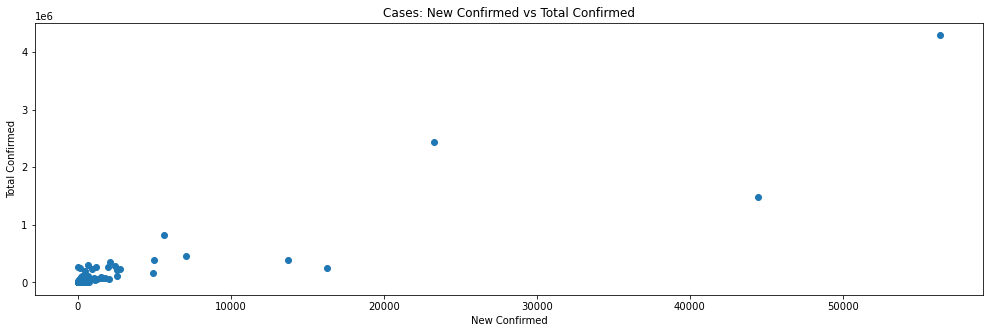

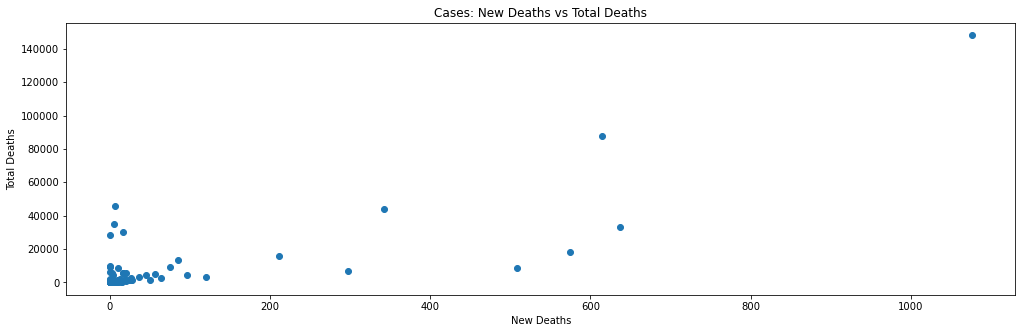

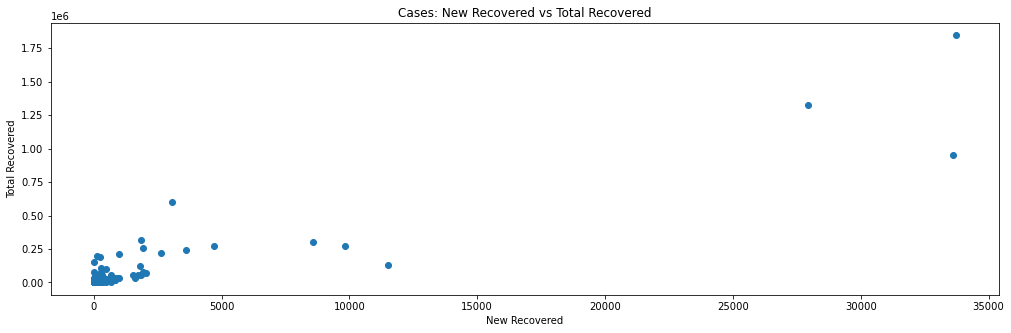

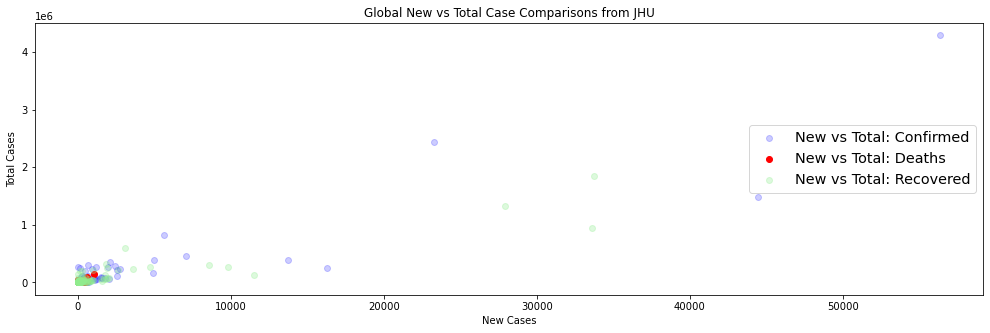

In [4]:
# SCATTER PLOTS

#New Confirmed vs Total Confirmed
nConfirmedData = []
tConfirmedData = []
for item in json_dataJHU['Countries']:
    nConfirmedData.append(item['NewConfirmed'])
for item in json_dataJHU['Countries']:
    tConfirmedData.append(item['TotalConfirmed'])

#New Deaths vs Total Deaths
nDeathsData = []
tDeathsData = []
for item in json_dataJHU['Countries']:
    nDeathsData.append(item['NewDeaths'])
for item in json_dataJHU['Countries']:
    tDeathsData.append(item['TotalDeaths'])

#New Recovered vs Total Recovered
nRecoveredData = []
tRecoveredData = []
for item in json_dataJHU['Countries']:
    nRecoveredData.append(item['NewRecovered'])
for item in json_dataJHU['Countries']:
    tRecoveredData.append(item['TotalRecovered'])

#Independent plot of new vs total confirmed cases
plt.rcParams["figure.figsize"]=17,5
plt.scatter(nConfirmedData, tConfirmedData)
plt.xlabel('New Confirmed')
plt.ylabel('Total Confirmed')
plt.title('Cases: New Confirmed vs Total Confirmed')
plt.show()

#Independent plot of new vs total deaths cases
plt.rcParams["figure.figsize"]=17,5
plt.scatter(nDeathsData, tDeathsData)
plt.xlabel('New Deaths')
plt.ylabel('Total Deaths')
plt.title('Cases: New Deaths vs Total Deaths')
plt.show()

#Independent plot of new vs total recovered cases
plt.rcParams["figure.figsize"]=17,5
plt.scatter(nRecoveredData, tRecoveredData)
plt.xlabel('New Recovered')
plt.ylabel('Total Recovered')
plt.title('Cases: New Recovered vs Total Recovered')
plt.show()

#Scatter Plots for new cases vs total cases
plt.rcParams["figure.figsize"]=17,5
fig, ax = plt.subplots()
ax.scatter(nConfirmedData, tConfirmedData, label='New vs Total: Confirmed', color='blue', alpha=0.2)
ax.scatter(nDeathsData, tDeathsData, label='New vs Total: Deaths', color ='red')
ax.scatter(nRecoveredData, tRecoveredData, label='New vs Total: Recovered', color='lightgreen', alpha=0.3)
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('New Cases')
plt.ylabel('Total Cases')
plt.title('Global New vs Total Case Comparisons from JHU')
plt.show()

<a id="USAvsWORLD"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

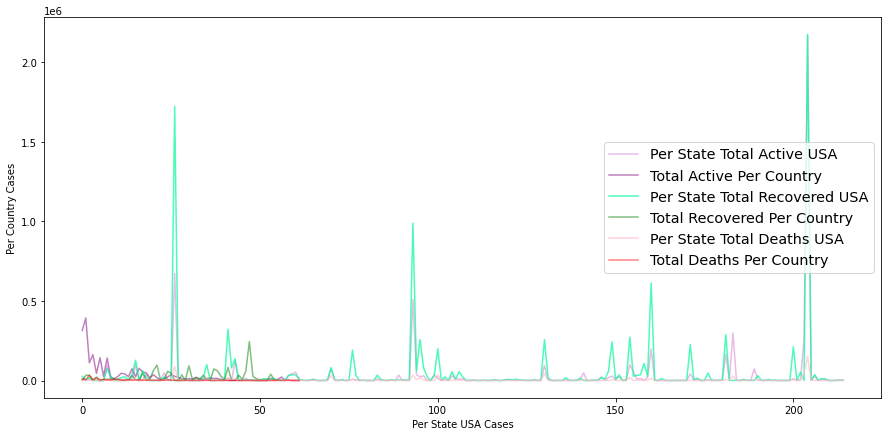

In [5]:
#Per State Active Cases USA vs Total Active Cases Per Country
activeUSAData = []
tActiveData = []
for item in json_data3:
    if item['active'] is None:
        activeUSAData.append(0)
    else:
        activeUSAData.append(item['active'])
for item in json_data4:
    if item['active'] is None:
        tActiveData.append(0)
    else:
        tActiveData.append(item['active'])

#Per State Deaths USA vs Total Deaths Per Country
DeathsUSAData = []
tDeathsCountryData = []
for item in json_data3:
    if item['deaths'] is None:
        DeathsUSAData.append(0)
    else:
        DeathsUSAData.append(item['deaths'])
for item in json_data4:
    if item['deaths'] is None:
        tDeathsCountryData.append(0)
    else:
        tDeathsCountryData.append(item['deaths'])

#Per State Recovered USA vs Total Recovered Per Country
RecoveredUSAData = []
tRecoveredCountryData = []
for item in json_data3:
    if item['recovered'] is None:
        RecoveredUSAData.append(0)
    else:
        RecoveredUSAData.append(item['recovered'])
for item in json_data2:
    if item['recovered'] is None:
        tRecoveredCountryData.append(0)
    else:
        tRecoveredCountryData.append(item['recovered'])

#Plots for USA per state cases vs per country cases
plt.rcParams["figure.figsize"]=15,7
fig, ax = plt.subplots()
ax.plot(range(0,len(activeUSAData)), activeUSAData, label='Per State Total Active USA', color='plum', alpha=0.7)
ax.plot(range(0,len(tActiveData)), tActiveData, label='Total Active Per Country', color = 'purple', alpha=0.5)
ax.plot(range(0,len(RecoveredUSAData)), RecoveredUSAData, label='Per State Total Recovered USA', color='mediumspringgreen', alpha=0.7)
ax.plot(range(0,len(tRecoveredCountryData)), tRecoveredCountryData, label='Total Recovered Per Country', color = 'green', alpha=0.5)
ax.plot(range(0,len(DeathsUSAData)), DeathsUSAData, label='Per State Total Deaths USA', color='pink', alpha=0.7)
ax.plot(range(0,len(tDeathsCountryData)), tDeathsCountryData, label='Total Deaths Per Country', color = 'red', alpha=0.5)
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Per State USA Cases')
plt.ylabel('Per Country Cases')
plt.show()

<a id="deathsbyage"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

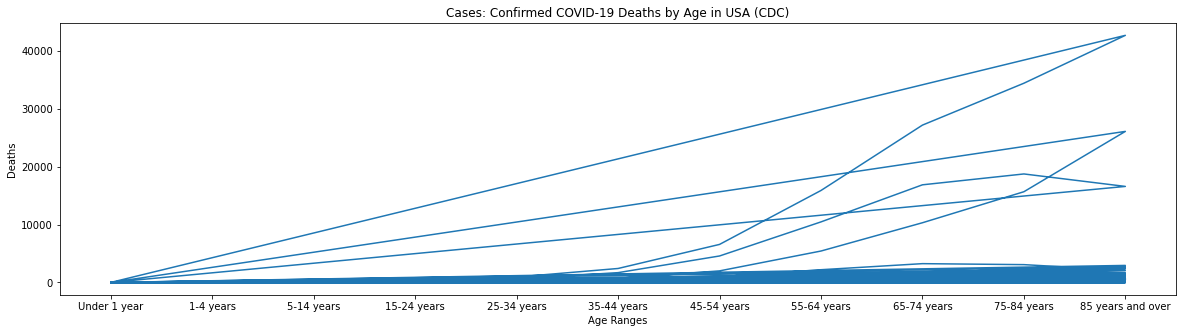

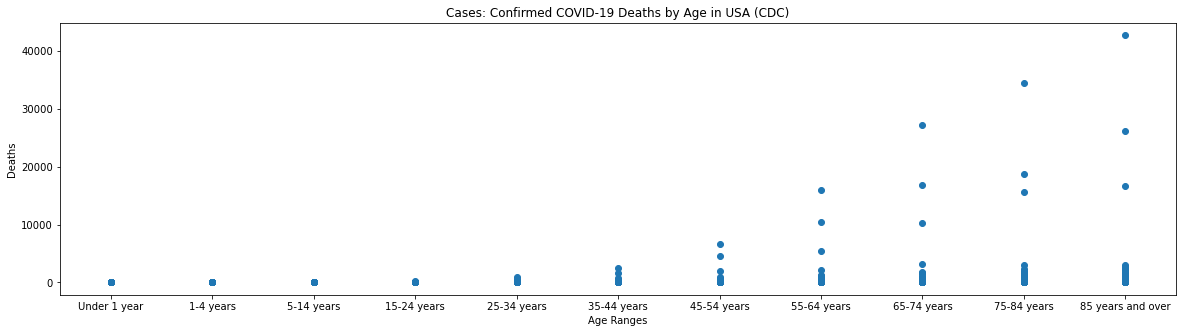

In [6]:
#Line Plot and Dot Plot on age of deaths for USA (CDC)
ageData = []
ages = []
for item in json_data5:
    try:   
        if(item['age_group'] != 'All ages' and item['age_group'] != 'All Ages' and item['age_group'] != 'Male, all ages' and item['age_group'] != 'Female, all ages'):
            ageData.append(int(item['covid_19_deaths']))
            ages.append(item['age_group'])
    except KeyError:
        continue
plt.figure(figsize=(20, 5))
plt.plot(ages, ageData)
plt.xlabel('Age Ranges')
plt.ylabel('Deaths')
plt.title('Cases: Confirmed COVID-19 Deaths by Age in USA (CDC)')
plt.show()

plt.figure(figsize=(20, 5))
plt.scatter(ages, ageData)
plt.xlabel('Age Ranges')
plt.ylabel('Deaths')
plt.title('Cases: Confirmed COVID-19 Deaths by Age in USA (CDC)')
plt.show()

#Line Plot and Dot Plot on age of deaths per Country from OWID
#print(owid_data)

#ageDataOWID = [country_age_deaths_data['median_age'][4],country_age_deaths_data['aged_65_older'][4],country_age_deaths_data['aged_70_older'][4]]
#agesOWID = ['median_age', 'aged_65_older', 'aged_70_older']

#plt.figure(figsize=(20, 5))
#plt.plot(agesOWID, ageDataOWID)
#plt.xlabel('Age Ranges')
#plt.ylabel('Deaths')
#plt.title('Cases: Confirmed COVID-19 Deaths by Age per Country (OWID) [End of March]')
#plt.show()

#plt.figure(figsize=(20, 5))
#plt.scatter(agesOWID, ageDataOWID)
#plt.xlabel('Age Ranges')
#plt.ylabel('Deaths')
#plt.title('Cases: Confirmed COVID-19 Deaths by Age per Country (OWID) [End of March]')
#plt.show()

<a id="usa_counties"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

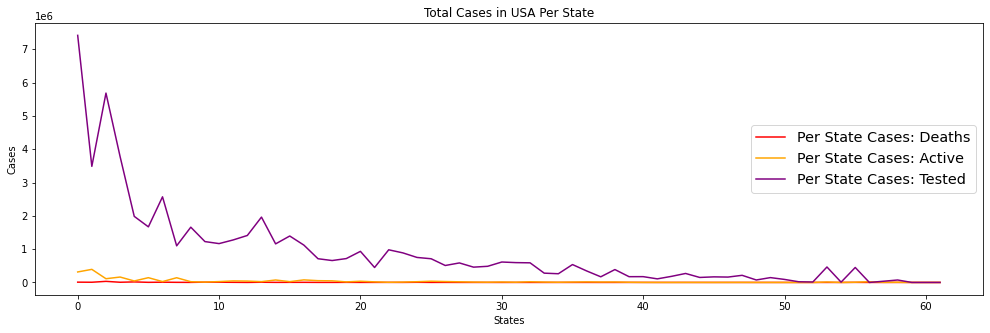

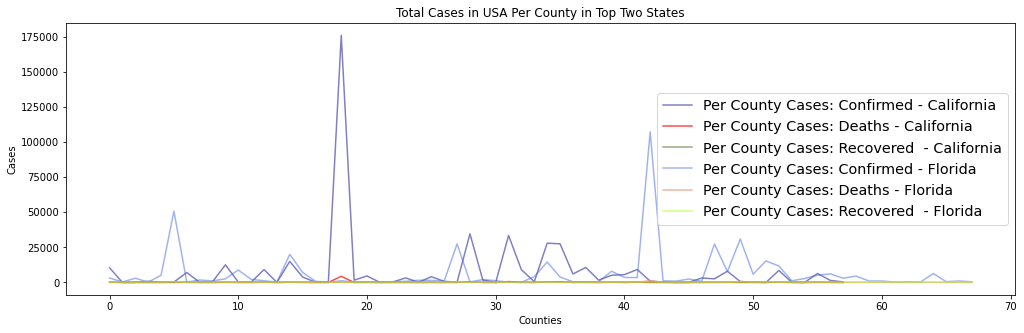

In [7]:
#Comparison plot of data for top two states per county in USA
stateData = []
states = []

stateData_deaths = []
stateData_active = []
stateData_tested = []

for item in json_data4:
    if item['cases'] is None:
        stateData.append(0)
        stateData_deaths.append(0)
        stateData_active.append(0)
        stateData_tested.append(0)
    else:
        stateData.append(item['cases'])
        stateData_deaths.append(item['deaths'])
        stateData_active.append(item['active'])
        stateData_tested.append(item['tests'])
    states.append(item['state'])

#Get the two states with the most total cases in USA
largestCase_State_Index = stateData.index(max(stateData))
SecondLargest_stateData = stateData.copy()
SecondLargest_stateData.remove(max(stateData))
SecondLargestCase_State_Index = stateData.index(max(SecondLargest_stateData))
top2states = [states[largestCase_State_Index], states[SecondLargestCase_State_Index]]

#Get data and do analysis on top two states
stateCountyDataFIRST_Confirmed = []
stateCountyDataFIRST_Deaths = []
stateCountyDataFIRST_Recovered = []
stateCountyFIRST = []

stateCountyDataSECOND_Confirmed = []
stateCountyDataSECOND_Deaths = []
stateCountyDataSECOND_Recovered = []
stateCountySECOND = []

for item in json_data6:
    if item['province'] == top2states[0]:
        stateCountyDataFIRST_Confirmed.append(int(item['stats']['confirmed']))
        stateCountyDataFIRST_Deaths.append(int(item['stats']['deaths']))
        stateCountyDataFIRST_Recovered.append(int(item['stats']['recovered']))
        stateCountyFIRST.append(item['county'])

for item in json_data6:
    if item['province'] == top2states[1]:
        stateCountyDataSECOND_Confirmed.append(int(item['stats']['confirmed']))
        stateCountyDataSECOND_Deaths.append(int(item['stats']['deaths']))
        stateCountyDataSECOND_Recovered.append(int(item['stats']['recovered']))
        stateCountySECOND.append(item['county'])

#PLOT for State Totals
plt.rcParams["figure.figsize"]=17,5
fig, ax = plt.subplots()
ax.plot(range(0,len(states)), stateData_deaths, label='Per State Cases: Deaths', color='red')
ax.plot(range(0,len(states)), stateData_active, label='Per State Cases: Active', color ='orange')
ax.plot(range(0,len(states)), stateData_tested, label='Per State Cases: Tested', color='purple')
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('States')
plt.ylabel('Cases')
plt.title('Total Cases in USA Per State')
plt.show()

#PLOT for County Totals
plt.rcParams["figure.figsize"]=17,5
fig, ax = plt.subplots()
ax.plot(range(0,len(stateCountyFIRST)), stateCountyDataFIRST_Confirmed, label='Per County Cases: Confirmed - '+top2states[0], color='darkblue', alpha = 0.5)
ax.plot(range(0,len(stateCountyFIRST)), stateCountyDataFIRST_Deaths, label='Per County Cases: Deaths - '+top2states[0], color = 'red', alpha = 0.7)
ax.plot(range(0,len(stateCountyFIRST)), stateCountyDataFIRST_Recovered, label='Per County Cases: Recovered  - '+top2states[0], color='darkolivegreen', alpha = 0.6)
ax.plot(range(0,len(stateCountySECOND)), stateCountyDataSECOND_Confirmed, label='Per County Cases: Confirmed - '+top2states[1], color = 'royalblue', alpha = 0.5)
ax.plot(range(0,len(stateCountySECOND)), stateCountyDataSECOND_Deaths, label='Per County Cases: Deaths - '+top2states[1], color='darksalmon', alpha = 0.7)
ax.plot(range(0,len(stateCountySECOND)), stateCountyDataSECOND_Recovered, label='Per County Cases: Recovered  - '+top2states[1], color = 'greenyellow', alpha = 0.6)
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Counties')
plt.ylabel('Cases')
plt.title('Total Cases in USA Per County in Top Two States')
plt.show()

<a id="dist"></a>
<a id="poisson"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

#### Measures Conducted on Probability Distributions

Next we consider the visualizations based on the outputs of our probability distributions considered.

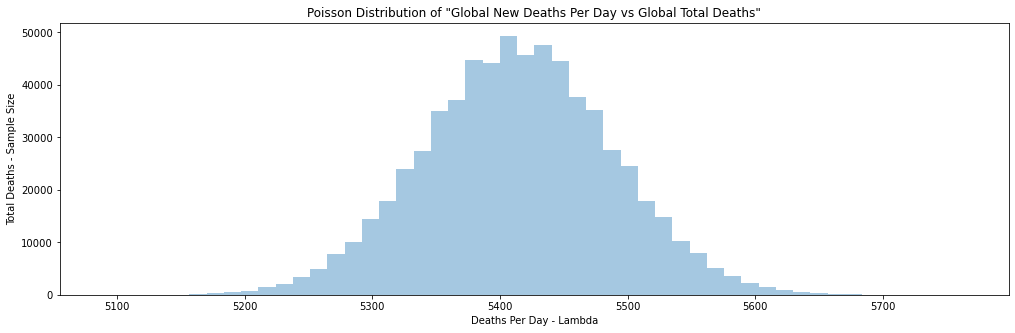

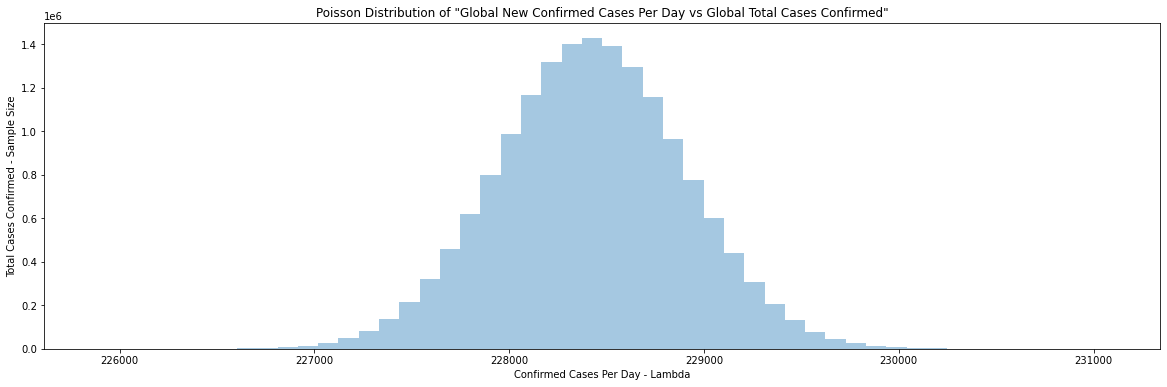

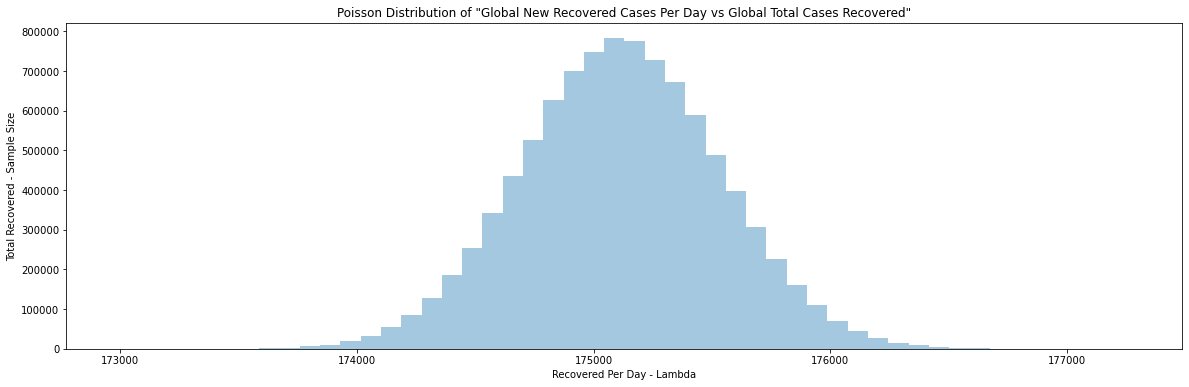

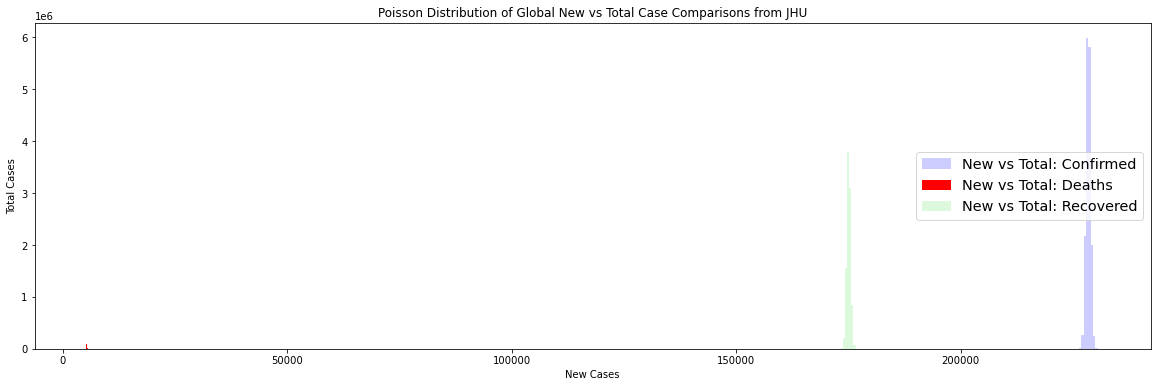

In [8]:
from numpy import random

#New Deaths vs Total Deaths
lamDeaths = json_dataJHU['Global']['NewDeaths']
sizeDeaths = json_dataJHU['Global']['TotalDeaths']

sns.distplot(random.poisson(int(lamDeaths), int(sizeDeaths)), kde=False)

plt.rcParams["figure.figsize"] = 20,6
plt.xlabel('Deaths Per Day - Lambda')
plt.ylabel('Total Deaths - Sample Size')
plt.title('Poisson Distribution of "Global New Deaths Per Day vs Global Total Deaths"')
plt.show() 

#New Confirmed vs Total Confirmed
lamConfirmed = json_dataJHU['Global']['NewConfirmed']
sizeConfirmed = json_dataJHU['Global']['TotalConfirmed']

sns.distplot(random.poisson(int(lamConfirmed), int(sizeConfirmed)), kde=False)

plt.rcParams["figure.figsize"] = 20,6
plt.xlabel('Confirmed Cases Per Day - Lambda')
plt.ylabel('Total Cases Confirmed - Sample Size')
plt.title('Poisson Distribution of "Global New Confirmed Cases Per Day vs Global Total Cases Confirmed"')
plt.show() 

#New Recovered vs Total Recovered
lamRecovered = json_dataJHU['Global']['NewRecovered']
sizeRecovered = json_dataJHU['Global']['TotalRecovered']

sns.distplot(random.poisson(int(lamRecovered), int(sizeRecovered)), kde=False)

plt.rcParams["figure.figsize"] = 20,6
plt.xlabel('Recovered Per Day - Lambda')
plt.ylabel('Total Recovered - Sample Size')
plt.title('Poisson Distribution of "Global New Recovered Cases Per Day vs Global Total Cases Recovered"')
plt.show()

#Plots for new cases vs total cases
plt.rcParams["figure.figsize"]=20,6
fig, ax = plt.subplots()
ax.hist(random.poisson(int(lamConfirmed), int(sizeConfirmed)), label='New vs Total: Confirmed', color='blue', alpha=0.2)
ax.hist(random.poisson(int(lamDeaths), int(sizeDeaths)), label='New vs Total: Deaths', color ='red')
ax.hist(random.poisson(int(lamRecovered), int(sizeRecovered)), label='New vs Total: Recovered', color='lightgreen', alpha=0.3)
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('New Cases')
plt.ylabel('Total Cases')
plt.title('Poisson Distribution of Global New vs Total Case Comparisons from JHU')
plt.show()

<a id="gamma"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

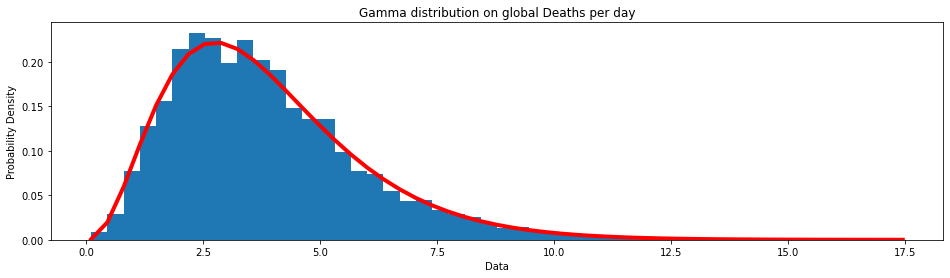

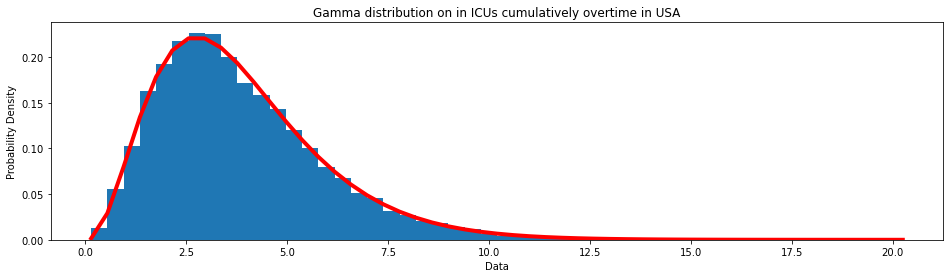

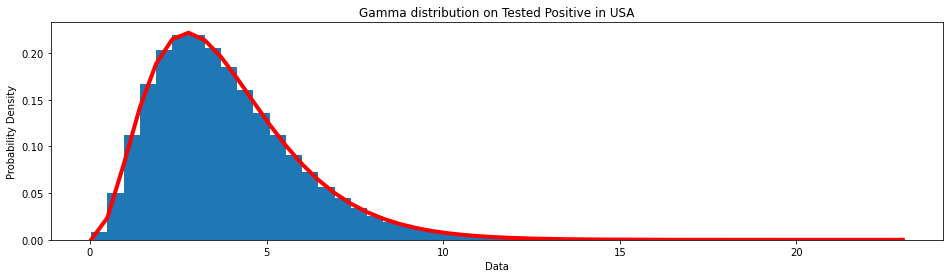

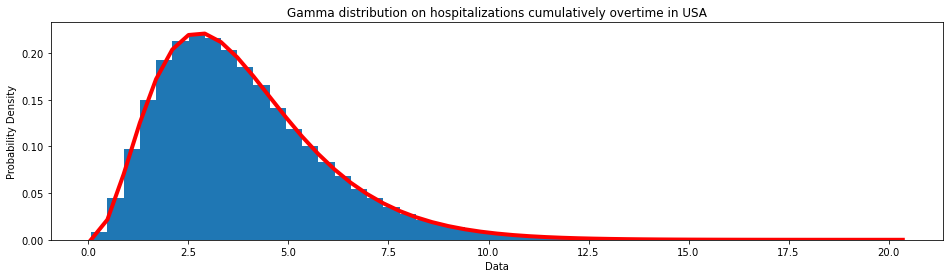

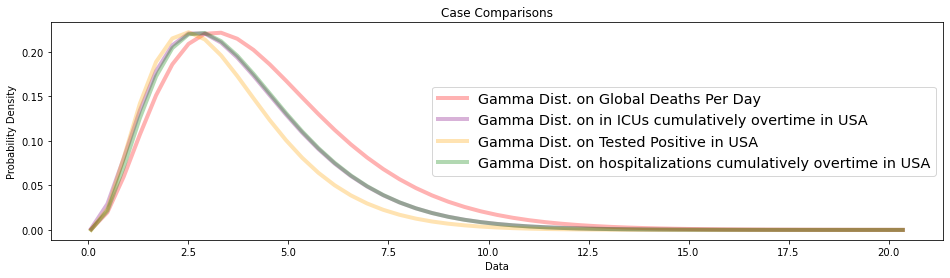

In [6]:
import matplotlib.pyplot as plt
import scipy.special as sps

#Gamma distribution on global Deaths per day

shape, scale = 3.50, 1.10

gammadist = np.random.gamma(shape, scale, int(json_dataJHU['Global']['NewDeaths']))

plt.rcParams["figure.figsize"]=16,4
count, bins, ignored = plt.hist(gammadist, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale)) / (sps.gamma(shape)*scale**shape)
plt.plot(bins, y, linewidth=4, color='r')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Gamma distribution on global Deaths per day')
plt.show()

#Gamma distribution in ICUs cumulatively overtime in USA

in_ICU = json_data1[0]['inIcuCumulative']

shape, scale = 3.50, 1.10 # mean and dispersion
gammadist2 = np.random.gamma(shape, scale, int(in_ICU))

plt.rcParams["figure.figsize"]=16,4
count, bins, ignored = plt.hist(gammadist2, 50, density=True)
y2 = bins**(shape-1)*(np.exp(-bins/scale)) / (sps.gamma(shape)*scale**shape)
plt.plot(bins, y2, linewidth=4, color='r')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Gamma distribution on in ICUs cumulatively overtime in USA')
plt.show()

#Gamma distribution on Tested Positive in USA

tested_positive = json_data1[0]['positive']

shape, scale = 3.50, 1.10 # mean and dispersion
gammadist3 = np.random.gamma(shape, scale, int(tested_positive))

plt.rcParams["figure.figsize"]=16,4
count, bins, ignored = plt.hist(gammadist3, 50, density=True)
y3 = bins**(shape-1)*(np.exp(-bins/scale)) / (sps.gamma(shape)*scale**shape)
plt.plot(bins, y3, linewidth=4, color='r')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Gamma distribution on Tested Positive in USA')
plt.show()

#Gamma distribution on hospitalizations cumulatively overtime in USA

in_hospital = json_data1[0]['hospitalizedCumulative']

shape, scale = 3.50, 1.10 # mean and dispersion
gammadist4 = np.random.gamma(shape, scale, int(in_hospital))

plt.rcParams["figure.figsize"]=16,4
count, bins, ignored = plt.hist(gammadist4, 50, density=True)
y4 = bins**(shape-1)*(np.exp(-bins/scale)) / (sps.gamma(shape)*scale**shape)
plt.plot(bins, y4, linewidth=4, color='r')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Gamma distribution on hospitalizations cumulatively overtime in USA')
plt.show()

#Scatter Plots for comparisons on global deaths per day vs ICUs cumulatively in USA vs tested positive in USA vs hospitalization cumulatively overtime in USA
plt.rcParams["figure.figsize"]=16,4
fig, ax = plt.subplots()
ax.plot(bins, y, label='Gamma Dist. on Global Deaths Per Day', linewidth=4, color='red', alpha=0.3)
ax.plot(bins, y2, label='Gamma Dist. on in ICUs cumulatively overtime in USA', linewidth=4, color ='purple', alpha=0.3)
ax.plot(bins, y3, label='Gamma Dist. on Tested Positive in USA', color='orange', linewidth=4, alpha=0.3)
ax.plot(bins, y4, label='Gamma Dist. on hospitalizations cumulatively overtime in USA', linewidth=4, color='green', alpha=0.3)
legend = ax.legend(loc='center right', fontsize='x-large')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Case Comparisons')
plt.show()

<a id="lognorm"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

In [10]:
#Function for lognormal calculations CAN ONLY BE USED ON NORMALLY DISTRIBUTED DATA

def generate_lognormal_samples(mean, stdev, n=1):
    """
    Returns n samples taken from a lognormal distribution, based on mean and
    standard deviation calaculated from the original non-logged population.
    
    Converts mean and standard deviation to underlying lognormal distribution
    mu and sigma based on calculations desribed at:
        https://blogs.sas.com/content/iml/2014/06/04/simulate-lognormal-data-
        with-specified-mean-and-variance.html
        
    Returns a numpy array of floats if n > 1, otherwise return a float
    """
    
    # Calculate mu and sigma of underlying lognormal distribution
    phi = mean + (stdev ** 2) ** 0.5
    mu = abs(np.log(mean ** 2 / phi))
    sigma = (np.log(phi ** 2 / mean ** 2)) ** 0.5
    
    # Generate lognormal population
    generated_pop = np.random.lognormal(mu, sigma , n)
    
    # Convert single sample (if n=1) to a float, otherwise leave as array
    generated_pop = \
        generated_pop[0] if len(generated_pop) == 1 else generated_pop
        
    return generated_pop

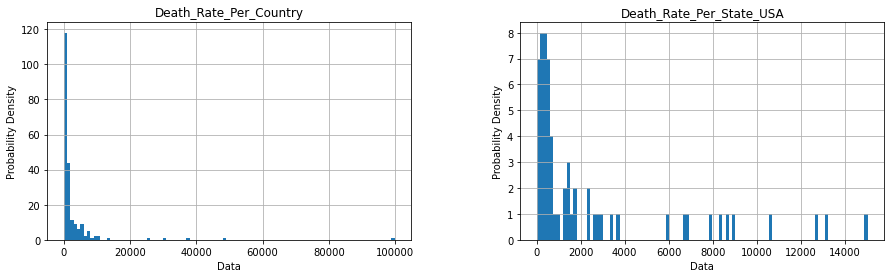

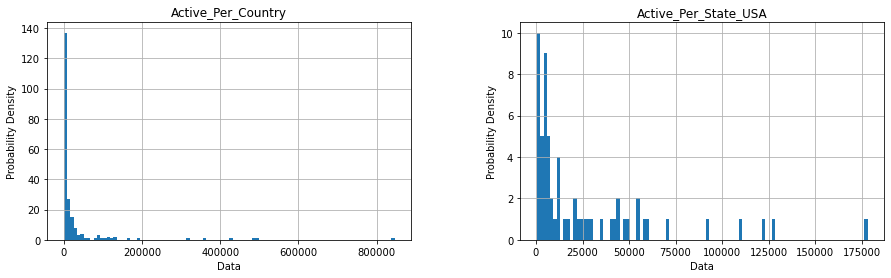

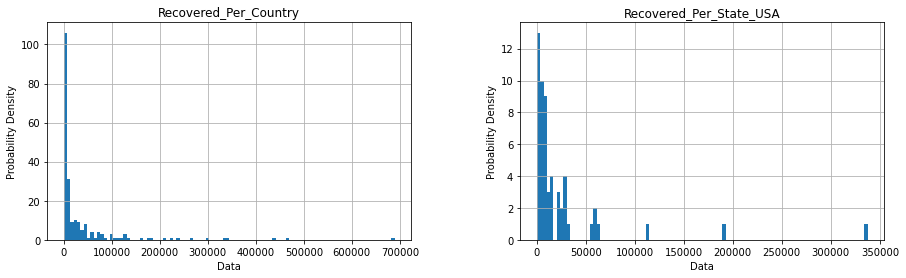

In [11]:
##Log-Normal distribution for How many deaths per country worldwide? VS How many deaths per state in USA?

#Deaths data per country
nData = []
for item in json_data3:
    if item['deaths'] is None:
        nData.append(0)
    else:
        nData.append(item['deaths']) 
#calculate mean, standard deviation and size
mu = np.mean(nData)
sigma = np.std(nData)
size = np.size(nData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist1 = generated_pop

#Deaths data per state in USA
nData = []
for item in json_data4:
    if item['deaths'] is None:
        nData.append(0)
    else:
        nData.append(item['deaths']) 
#calculate mean, standard deviation and size
mu = np.mean(nData)
sigma = np.std(nData)
size = np.size(nData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist2 = generated_pop

%matplotlib inline
bins = np.arange(0,51,1)

plt.rcParams["figure.figsize"]=15,4

dflux = pd.DataFrame(dict(Death_Rate_Per_Country=dist1))
dflux2 = pd.DataFrame(dict(Death_Rate_Per_State_USA=dist2))

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Probability Density')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Probability Density')
dflux.hist('Death_Rate_Per_Country', bins=100, ax=axes[0])
dflux2.hist('Death_Rate_Per_State_USA', bins=100, ax=axes[1])
plt.show()


#Log-Normal distribution for How many active cases per country? VS How many active cases per state in USA?

#Active data per country
aData = []
for item in json_data3:
    if item['active'] is None:
        aData.append(0)
    else:
        aData.append(item['active']) 
#calculate mean, standard deviation and size
mu = np.mean(aData)
sigma = np.std(aData)
size = np.size(aData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist1 = generated_pop

#Active data per state in USA
aData = []
for item in json_data4:
    if item['active'] is None:
        aData.append(0)
    else:
        aData.append(item['active']) 
#calculate mean, standard deviation and size
mu = np.mean(aData)
sigma = np.std(aData)
size = np.size(aData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist2 = generated_pop

%matplotlib inline
bins = np.arange(0,51,1)

plt.rcParams["figure.figsize"]=15,4

dflux = pd.DataFrame(dict(Active_Per_Country=dist1))
dflux2 = pd.DataFrame(dict(Active_Per_State_USA=dist2))

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Probability Density')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Probability Density')
dflux.hist('Active_Per_Country', bins=100, ax=axes[0])
dflux2.hist('Active_Per_State_USA', bins=100, ax=axes[1])
plt.show()


#Log-Normal distribution for How many recovered cases per country? VS How many recovered cases per state in USA?

#Recovered data per country
rData = []
for item in json_data3:
    if item['recovered'] is None:
        rData.append(0)
    else:
        rData.append(item['recovered']) 
#calculate mean, standard deviation and size
mu = np.mean(rData)
sigma = np.std(rData)
size = np.size(rData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist1 = generated_pop

#Recovered data per state in USA
rData = []
for item in json_data2:
    if item['recovered'] is None:
        rData.append(0)
    else:
        rData.append(item['recovered']) 
#calculate mean, standard deviation and size
mu = np.mean(rData)
sigma = np.std(rData)
size = np.size(rData)
generated_pop = generate_lognormal_samples(mu, sigma, size)
dist2 = generated_pop

%matplotlib inline
bins = np.arange(0,51,1)

plt.rcParams["figure.figsize"]=15,4

dflux = pd.DataFrame(dict(Recovered_Per_Country=dist1))
dflux2 = pd.DataFrame(dict(Recovered_Per_State_USA=dist2))

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Probability Density')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Probability Density')
dflux.hist('Recovered_Per_Country', bins=100, ax=axes[0])
dflux2.hist('Recovered_Per_State_USA', bins=100, ax=axes[1])
plt.show()

<a id="weib"></a> <a id="scatterJHU"></a> [Back to Section 2](#cell2)

/home/jg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/jg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


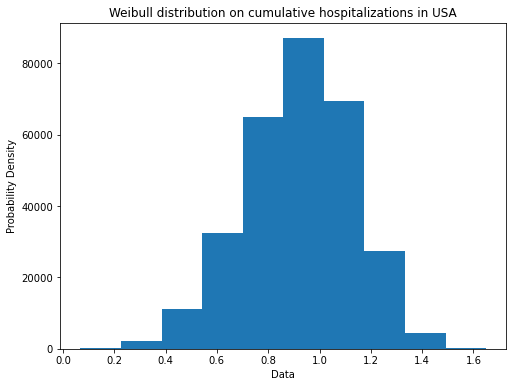

/home/jg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/home/jg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


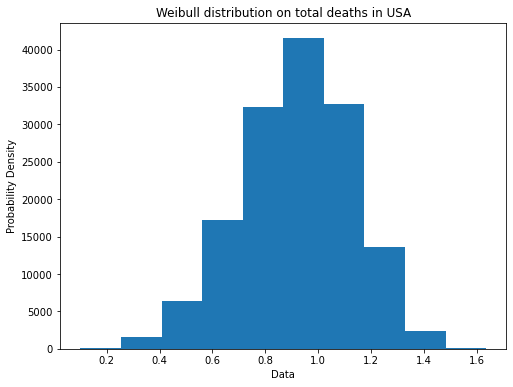

In [13]:
#Weibull distribution on cumulative hospitalizations in USA

#Hospitalized in USA
hospOvertime = in_hospital

#Died in USA
diedUSA = json_dataJHU['Countries'][177]['TotalDeaths']


a = 5 # shape
sample = np.random.weibull(a, hospOvertime)

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

count, bins, ignored = plt.hist(sample)
scale = count.max()/weib(hospOvertime, 1., a).max()
plt.rcParams["figure.figsize"] = 8,6
plt.plot(hospOvertime, weib(hospOvertime, 1., a)*scale)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Weibull distribution on cumulative hospitalizations in USA')
plt.show()


#Weibull distribution on total deaths in USA

a = 5 # shape
sample = np.random.weibull(a, diedUSA)

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

count, bins, ignored = plt.hist(sample)
scale = count.max()/weib(diedUSA, 1., a).max()
plt.rcParams["figure.figsize"] = 8,6
plt.plot(diedUSA, weib(diedUSA, 1., a)*scale)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Weibull distribution on total deaths in USA')
plt.show()